In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set()
a4_dims = (11.7, 8.27)

In [3]:
df = pd.read_csv('project_data/remuneracao_quadros_tecnicos_modelagem.csv', sep = ';')

In [4]:
df.dtypes

registro_funcional                    int64
num_vinculo                           int64
dc_cargo_base                        object
grupo_cargo_base                     object
nivel_cargo_base                     object
segmento_cargo_base                  object
referencia_cargo_comissao            object
relacao_juridica                     object
qt_hora_jornada_semanal               int64
dc_orgao                             object
qtd_servidores_orgao                float64
ano_nascimento                        int64
sexo                                 object
raca                                 object
pessoa_com_deficiencia               object
vl_remuneracao_base_mensal          float64
vl_outro_elemento_remuneracao       float64
vl_remuneracao_total_bruta          float64
cedido                                 bool
tempo_exercicio_dias                  int64
tempo_exercicio_dias_padro          float64
vl_remuneracao_total_bruta_padro    float64
k_means4                        

In [5]:
for col in df.columns:
    print(f'{col} : {df[col].isnull().sum()} missings')

registro_funcional : 0 missings
num_vinculo : 0 missings
dc_cargo_base : 0 missings
grupo_cargo_base : 0 missings
nivel_cargo_base : 0 missings
segmento_cargo_base : 65 missings
referencia_cargo_comissao : 2243 missings
relacao_juridica : 0 missings
qt_hora_jornada_semanal : 0 missings
dc_orgao : 0 missings
qtd_servidores_orgao : 0 missings
ano_nascimento : 0 missings
sexo : 0 missings
raca : 0 missings
pessoa_com_deficiencia : 0 missings
vl_remuneracao_base_mensal : 22 missings
vl_outro_elemento_remuneracao : 84 missings
vl_remuneracao_total_bruta : 0 missings
cedido : 0 missings
tempo_exercicio_dias : 0 missings
tempo_exercicio_dias_padro : 0 missings
vl_remuneracao_total_bruta_padro : 0 missings
k_means4 : 0 missings


In [6]:
df['referencia_cargo_comissao'] = df['referencia_cargo_comissao'].apply(lambda x: x if x else 'nenhum')

Vamos ver agora questão dos missings na remuneração. Como que pode não ter remuneração base e ter remuneração bruta?

In [7]:
df[df['vl_remuneracao_base_mensal'].isnull()][['dc_cargo_base', 
                                               'vl_remuneracao_base_mensal', 
                                               'vl_outro_elemento_remuneracao',
                                              'vl_remuneracao_total_bruta']]

,dc_cargo_base,vl_remuneracao_base_mensal,vl_outro_elemento_remuneracao,vl_remuneracao_total_bruta
17,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",NaN,NaN,0.0
49,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",NaN,NaN,0.0
77,ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL,NaN,NaN,0.0
83,ANALISTA PLANEJAMENTO DESENV ORGANIZACIONAL,NaN,NaN,0.0
101,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",NaN,NaN,0.0
138,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",NaN,NaN,0.0
256,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",NaN,NaN,0.0
265,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",NaN,NaN,0.0
330,ANALISTA DE ORDENAMENTO TERRITORIAL,NaN,NaN,0.0
470,ANALISTA DE INFORMACOES CULTURA E DESPORTO,NaN,NaN,0.0


Devem ser servidores afastados ou em licença sem vencimentos. Vamos removê-los.

In [8]:
df = df[df['vl_remuneracao_base_mensal'].notnull()].copy().reset_index(drop=True)

No caso dos servidores cujo "outro elemento da remuneração" é vazio, parece estar tudo certo, basta preencher com 0.

In [9]:
df[df['vl_outro_elemento_remuneracao'].isnull()][['dc_cargo_base', 
                                               'vl_remuneracao_base_mensal', 
                                               'vl_outro_elemento_remuneracao',
                                              'vl_remuneracao_total_bruta']]

,dc_cargo_base,vl_remuneracao_base_mensal,vl_outro_elemento_remuneracao,vl_remuneracao_total_bruta
69,ANALISTA,7215.11,NaN,7215.11
237,CONTADOR,16071.59,NaN,16071.59
280,ANALISTA,7215.11,NaN,7215.11
418,ANALISTA DE INFORMACOES CULTURA E DESPORTO,8636.40,NaN,8636.40
611,"PROFISSIONAL ENG, ARQ, AGRONOMIA,GEOLOGIA",8309.10,NaN,8309.10
...,...,...,...,...
2719,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,6108.77,NaN,6108.77
2727,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,6232.69,NaN,6232.69
2822,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,6183.12,NaN,6183.12
2829,ANALISTA ASSISTENCIA DESENVOLVIMENTO SOCIAL,6108.77,NaN,6108.77


In [10]:
df['vl_outro_elemento_remuneracao'] = df['vl_outro_elemento_remuneracao'].fillna(0)

Quem não tem referência do cargo em comissão é porque não ocupa cargo em comissão. Por isso vou colocar um valor padrão para essa variável.

In [16]:
df['referencia_cargo_comissao'] = df['referencia_cargo_comissao'].fillna('nenhum')

In [17]:
for col in df.columns:
    missings = df[col].isnull().sum()
    if missings:
        print(f'{col} : {missings} missings')

segmento_cargo_base : 65 missings


Faltou só o seguimento do cargo base. Várias carreiras não possuem isso. Vamos adicionar um valor padrão

In [18]:
df['segmento_cargo_base'] = df['segmento_cargo_base'].fillna('não se aplica')

Vamos ver as distribuiçẽos das variáveis

In [30]:
df.dtypes

registro_funcional                    int64
num_vinculo                           int64
dc_cargo_base                        object
grupo_cargo_base                     object
nivel_cargo_base                     object
segmento_cargo_base                  object
referencia_cargo_comissao            object
relacao_juridica                     object
qt_hora_jornada_semanal               int64
dc_orgao                             object
qtd_servidores_orgao                float64
ano_nascimento                        int64
sexo                                 object
raca                                 object
pessoa_com_deficiencia               object
vl_remuneracao_base_mensal          float64
vl_outro_elemento_remuneracao       float64
vl_remuneracao_total_bruta          float64
cedido                                 bool
tempo_exercicio_dias                  int64
tempo_exercicio_dias_padro          float64
vl_remuneracao_total_bruta_padro    float64
k_means4                        

In [31]:
df['registro_funcional'] = df['registro_funcional'].astype(str)
df['k_means4'] = df['k_means4'].astype(str)

In [33]:
cols_remuneracao = ['vl_remuneracao_base_mensal', 'vl_outro_elemento_remuneracao', 'vl_remuneracao_total_bruta']

In [34]:
df[cols_remuneracao].describe()

,vl_remuneracao_base_mensal,vl_outro_elemento_remuneracao,vl_remuneracao_total_bruta
count,2868.000000,2868.000000,2868.000000
mean,9803.580262,1581.009951,11384.590213
std,3909.235111,1585.741477,4871.454604
min,2211.600000,0.000000,2368.640000
25%,7386.882500,412.230000,8321.017500
50%,8268.380000,1291.215000,9393.250000
75%,10528.870000,2131.550000,12369.420000
max,24175.550000,16292.040000,36295.010000


<AxesSubplot:ylabel='Frequency'>

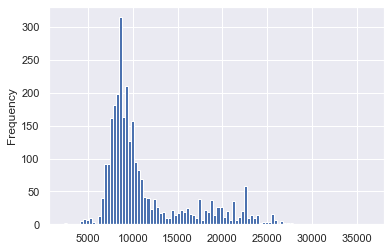

In [21]:
df['vl_remuneracao_total_bruta'].plot.hist(bins=100)

<AxesSubplot:xlabel='vl_remuneracao_total_bruta'>

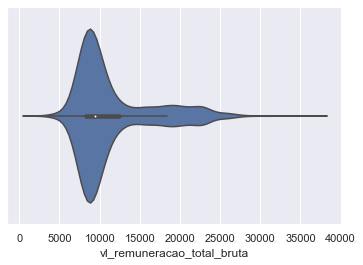

In [36]:
sns.violinplot(x=df['vl_remuneracao_total_bruta'])

<AxesSubplot:xlabel='vl_remuneracao_total_bruta'>

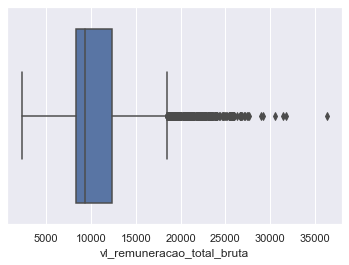

In [38]:
sns.boxplot(x= df['vl_remuneracao_total_bruta'])

In [47]:
from scipy import stats
import statsmodels.api as sm

In [41]:
shapiro_test = stats.shapiro(df['vl_remuneracao_total_bruta'])

In [42]:
shapiro_test

ShapiroResult(statistic=0.7981973886489868, pvalue=0.0)

In [45]:
stats.kstest(df['vl_remuneracao_total_bruta'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

<AxesSubplot:ylabel='Frequency'>

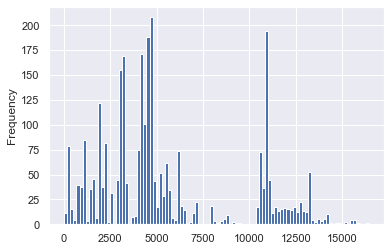

In [25]:
df['tempo_exercicio_dias'].plot.hist(bins=100)

/home/h-pgy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempo_exercicio_dias'>

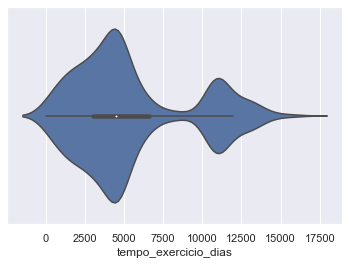

In [57]:
sns.violinplot(df['tempo_exercicio_dias'])

/home/h-pgy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempo_exercicio_dias'>

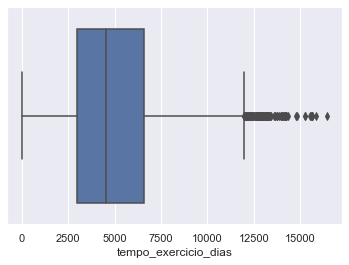

In [58]:
sns.boxplot(df['tempo_exercicio_dias'])

In [27]:
df[df['tempo_exercicio_dias']==0]

,registro_funcional,num_vinculo,dc_cargo_base,grupo_cargo_base,nivel_cargo_base,segmento_cargo_base,referencia_cargo_comissao,relacao_juridica,qt_hora_jornada_semanal,dc_orgao,...,raca,pessoa_com_deficiencia,vl_remuneracao_base_mensal,vl_outro_elemento_remuneracao,vl_remuneracao_total_bruta,cedido,tempo_exercicio_dias,tempo_exercicio_dias_padro,vl_remuneracao_total_bruta_padro,k_means4


In [59]:
from scipy.stats import pearsonr

/home/h-pgy/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempo_exercicio_dias', ylabel='vl_remuneracao_total_bruta'>

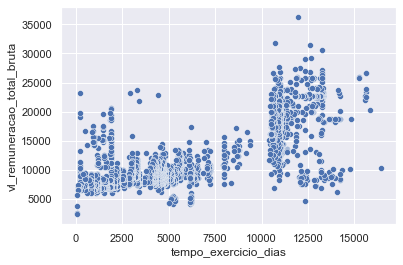

In [60]:
sns.scatterplot(df['tempo_exercicio_dias'], df['vl_remuneracao_total_bruta'])

In [61]:
pearsonr(df['tempo_exercicio_dias'], df['vl_remuneracao_total_bruta'])

(0.7331866970578186, 0.0)

In [52]:
reg_simples = sm.OLS(df['vl_remuneracao_total_bruta'], df['tempo_exercicio_dias']).fit()

In [56]:
reg_simples.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vl_remuneracao_total_bruta   R-squared (uncentered):                   0.849
Model:                                    OLS   Adj. R-squared (uncentered):              0.849
Method:                         Least Squares   F-statistic:                          1.609e+04
Date:                        Fri, 20 Aug 2021   Prob (F-statistic):                        0.00
Time:                                18:09:42   Log-Likelihood:                         -28389.
No. Observations:                        2868   AIC:                                  5.678e+04
Df Residuals:                            2867   BIC:                                  5.679e+04
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
tempo_exercicio_dias     1.7335      0.014    126.858      0.000       1.707       1.760
==============================================================================
Omnibus:                      307.030   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1481.985
Skew:                          -0.403   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""